<a href="https://colab.research.google.com/github/GurnishKaur/Machine-Learning/blob/main/EDA_%2B_Supervised_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

## Import the dataset


In [ ]:
# import some data to play with
from sklearn import datasets
flower_dataset = datasets.load_iris()
# convertiamo il dataset in un dataframe Pandas
df = pd.DataFrame(data=flower_dataset.data, columns=flower_dataset.feature_names)
df["target"] = flower_dataset.target

## Understanding the bigger picture / dataset information

In [ ]:
# read first five lines of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# read last five lines of the dataset
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# read the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# read the description - mean, median, mode of the dataset
df.describe()
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

## Data Preparation

In [ ]:
# check for the duplicate values in the dataset
df.duplicated().sum()

1

# Study the relationship between the variables

In [ ]:
# plot the value_counts of the target of the dataframe
df.target.value_counts()


0    50
1    50
2    50
Name: target, dtype: int64

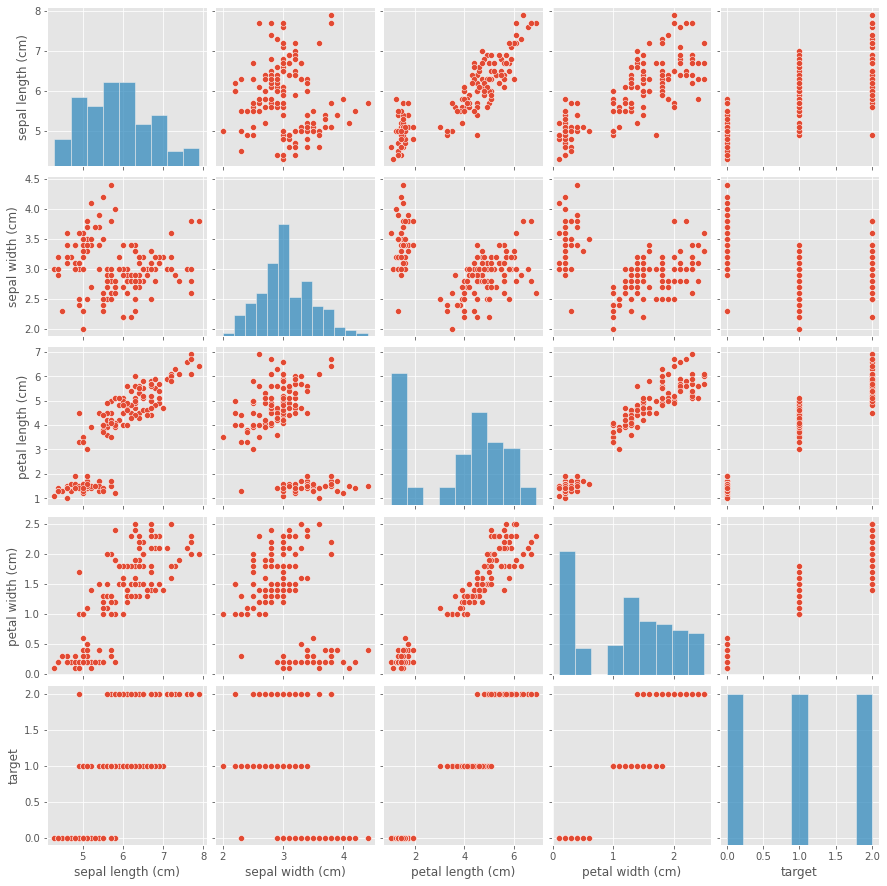

In [ ]:
# plot the pairplot of all the variables
import seaborn as sns
sns.pairplot(df)

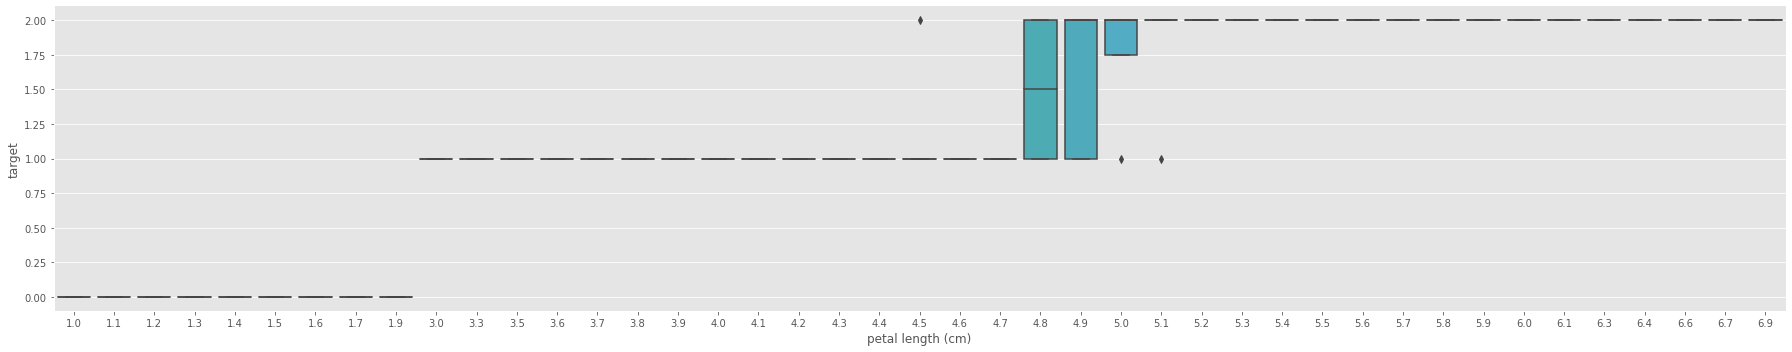

In [ ]:
# plot the boxplot of target and petal length
sns.catplot(x="petal length (cm)",y="target",data=df,kind="box",aspect=5)

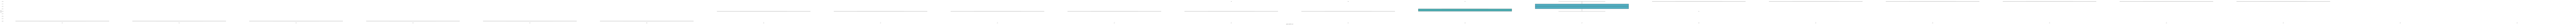

In [ ]:
sns.catplot(x="petal width (cm)",y="target",kind="box",data=df,aspect=100)

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

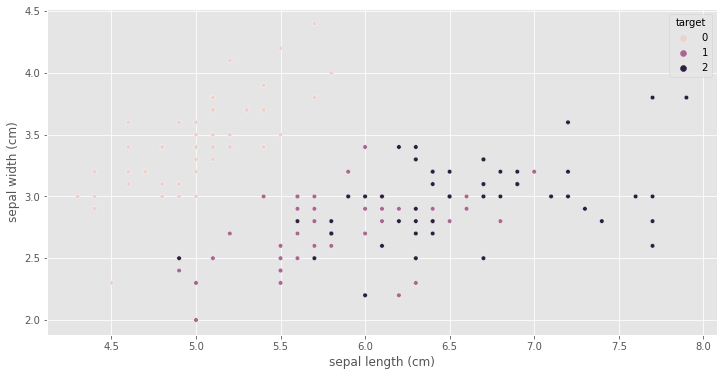

In [ ]:
# do the scatter plot of sepal length, sepal width and target
sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",hue="target",data=df,s=20)

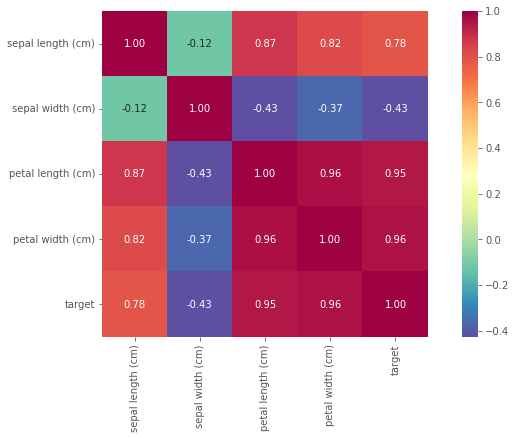

In [ ]:
#correlation map
stupid=df.corr()
sns.heatmap(stupid,cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
labels=df["target"]
features=df.drop("target",axis=1)
train_features,test_features, train_labels,test_labels=train_test_split(features,labels,test_size=0.30)
print(train_features.shape)
print(train_labels.shape)
print(test_labels.shape)
print(test_features.shape)


(105, 4)
(105,)
(45,)
(45, 4)


In [ ]:
nonsense=RandomForestClassifier(n_estimators=1000,random_state=42)
nonsense.fit(train_features,train_labels)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
shit=nonsense.predict(test_features)
print("\n\nAccuracy Score:",str(accuracy_score(test_labels, shit)*100) + "%")



Accuracy Score: 95.55555555555556%
